<a href="https://colab.research.google.com/github/MelvinSebastian99/Final-Project/blob/main/Code_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import IPython.display as ipd
import os
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cols = os.listdir('synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset')

In [ ]:
print(cols)

['no', 'two', 'four', 'five', 'nine', 'right', 'off', 'yes', 'six', 'dog', 'left', 'bird', 'marvel', 'wow', 'zero', 'eight', 'bed', 'go', 'house', 'tree', 'seven', 'on', 'three', 'one', 'down', 'stop', 'up', 'happy', 'cat', 'sheila']


In [ ]:
path = 'synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset'
count = pd.DataFrame([len(os.listdir(os.path.join(path, f))) for f in os.listdir(path)], columns=['Number Of Sample'], index=os.listdir(path))

In [ ]:
total_count = count['Number Of Sample'].sum()
print("Total number of samples:", total_count)

Total number of samples: 41849


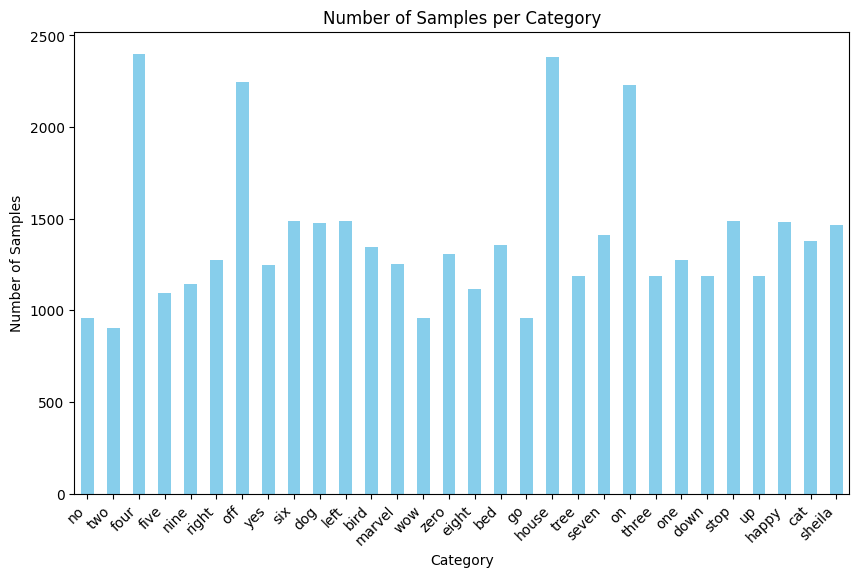

In [ ]:
ax = count.plot(kind='bar', legend=False, color='skyblue', figsize=(10, 6))
plt.title('Number of Samples per Category')
plt.xlabel('Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.show()

### Sample Audio Files

In [ ]:
print('Sample Audio of the word CAT:')
ipd.Audio('synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/cat/1017.wav')

Sample Audio of the word CAT:


In [ ]:
print('Sample Audio of the word DOG:')
ipd.Audio('synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/dog/1011.wav')

Sample Audio of the word DOG:


In [ ]:
print('Sample Audio of the word MARVEL:')
ipd.Audio('synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/marvel/1012.wav')

Sample Audio of the word MARVEL:


In [ ]:
print('Sample Audio of the word HAPPY:')
ipd.Audio('synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/happy/1012.wav')

Sample Audio of the word HAPPY:


In [ ]:
print('Sample Audio of the word STOP:')
ipd.Audio('synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/stop/1014.wav')

Sample Audio of the word STOP:


In [ ]:
import librosa as lr

def load_audio_files(path):
    audio_data = []
    labels = []

    for category in os.listdir(path):
        category_path = os.path.join(path, category)
        for audio_file in os.listdir(category_path):
            audio, _ = lr.load(os.path.join(category_path, audio_file), sr=16000)
            audio_data.append(audio)
            labels.append(category)

    return audio_data, labels

In [ ]:
audio_data, labels = load_audio_files('synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset')
df = pd.DataFrame()
df['Label'] = labels

In [ ]:
df.sample(10)

,Label
37079,up
35807,stop
14971,left
11672,six
26489,tree
4680,five
35255,stop
41709,sheila
8550,off
3241,four


In [ ]:
def plot_waveform(audio, sr, title):
    plt.figure(figsize=(14, 5)); lr.display.waveshow(audio, sr=sr); plt.title('Waveform'); plt.xlabel('Time (s)'); plt.ylabel('Amplitude'); plt.suptitle(title)

In [ ]:
def extract_mfcc(audio, sample_rate):
    mfcc_features = lr.feature.mfcc(y=audio, sr=sample_rate)
    return np.mean(mfcc_features), mfcc_features

def visualize_mfcc(mfcc_features, title):
    plt.figure(figsize=(14, 5))
    lr.display.specshow(mfcc_features, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.suptitle(title)

In [ ]:
def compute_mel_spectrogram(audio, sample_rate):
    mel_spectrogram = lr.feature.melspectrogram(y=audio, sr=sample_rate)
    return np.mean(mel_spectrogram), mel_spectrogram

def visualize_mel_spectrogram(mel_spectrogram, title, sample_rate):
    mel_spectrogram_db = lr.power_to_db(mel_spectrogram, ref=np.max)
    plt.figure(figsize=(14, 5))
    lr.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sample_rate)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.suptitle(title)

## Visualization of sample auido files

### Audio = two

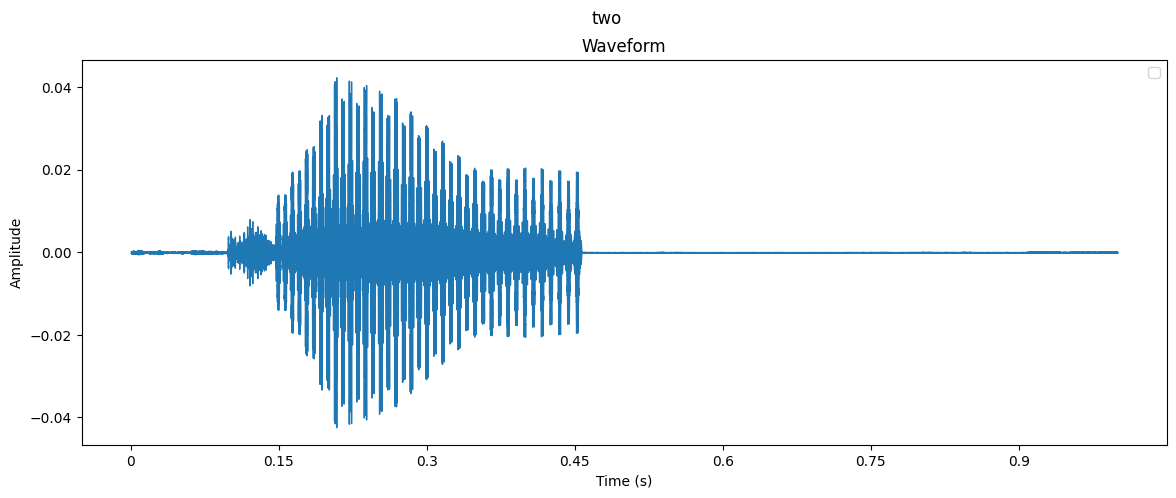

In [ ]:
plot_waveform(audio_data[1000],16000,labels[1000])
plt.legend()
plt.show()

MFCCs Mean: -29.570866
MFCCs shape: (20, 32)


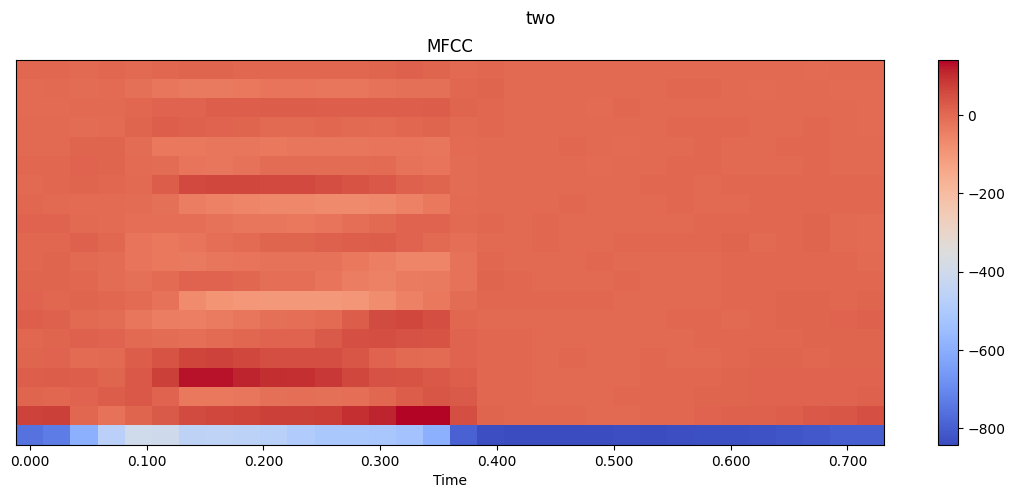

In [ ]:
mfccs_mean, mfccs = extract_mfcc(audio_data[1000], 16000)
print('MFCCs Mean:', mfccs_mean)
print('MFCCs shape:', mfccs.shape)
visualize_mfcc(mfccs,labels[1000])

Mel Mean: 0.00999214
Mel : (128, 32)


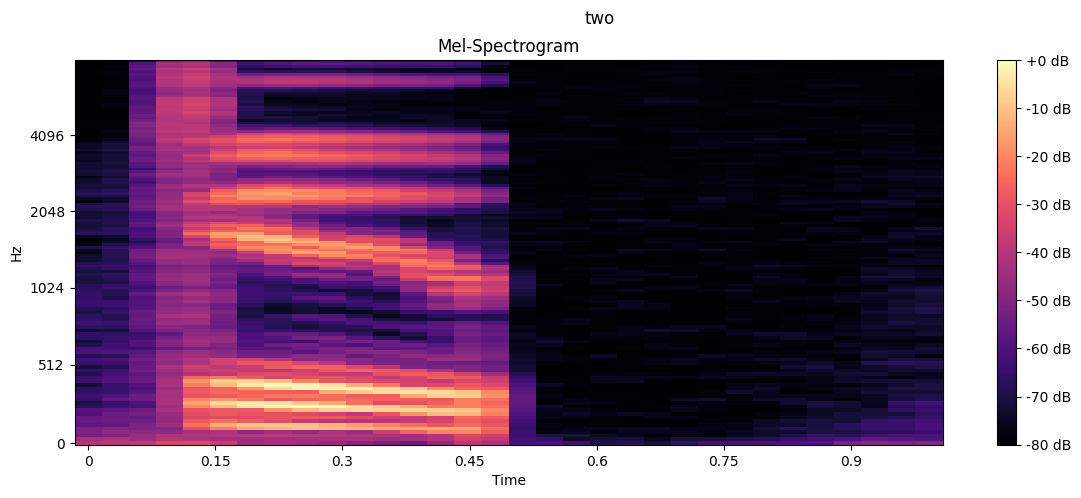

In [ ]:
mel_mean, mel = compute_mel_spectrogram(audio_data[1000],16000)
print('Mel Mean:',mel_mean)
print('Mel :',mel.shape)
visualize_mel_spectrogram(mel, labels[1000],16000)

### Audio = off

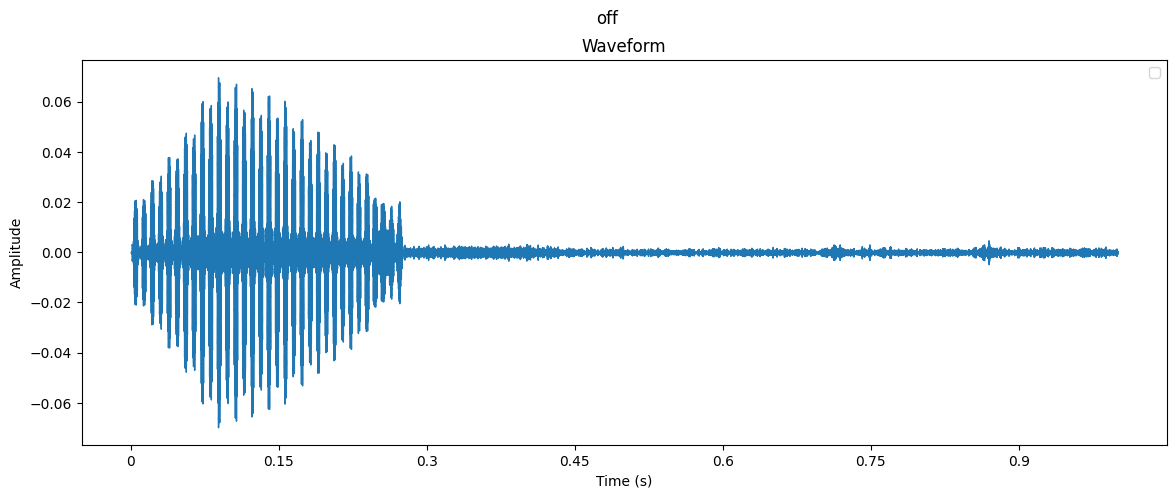

In [ ]:
plot_waveform(audio_data[10000],16000,labels[10000])
plt.legend()
plt.show()

MFCCs Mean: -19.591827
MFCCs shape: (20, 32)


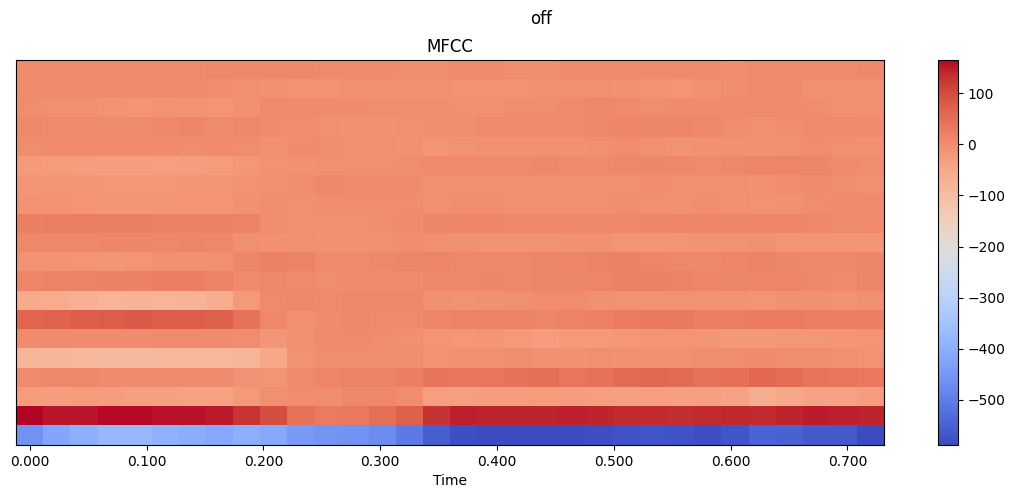

In [ ]:
mfccs_mean, mfccs = extract_mfcc(audio_data[10000], 16000)
print('MFCCs Mean:', mfccs_mean)
print('MFCCs shape:', mfccs.shape)
visualize_mfcc(mfccs,labels[10000])

Mel Mean: 0.018561607
Mel : (128, 32)


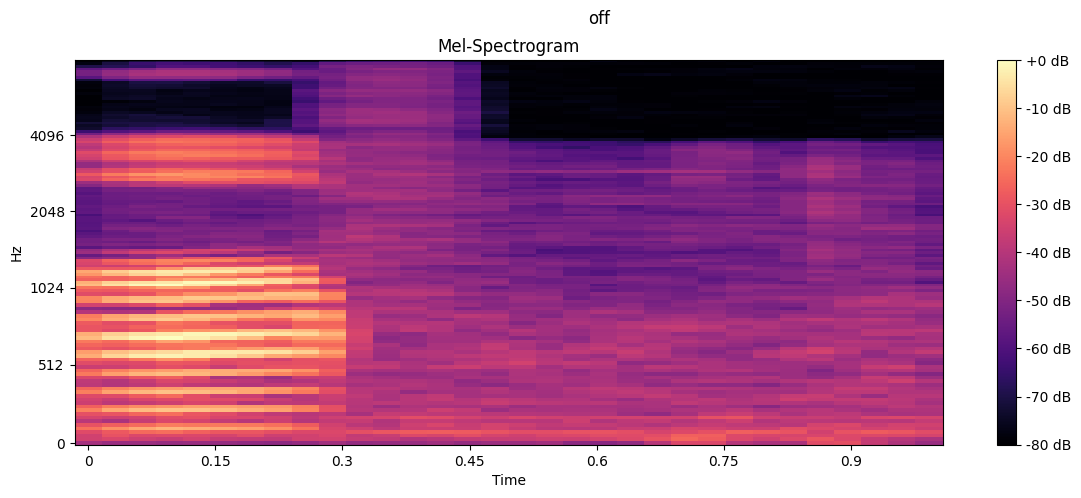

In [ ]:
mel_mean, mel = compute_mel_spectrogram(audio_data[10000],16000)
print('Mel Mean:',mel_mean)
print('Mel :',mel.shape)
visualize_mel_spectrogram(mel, labels[10000],16000)

### Audio = cat

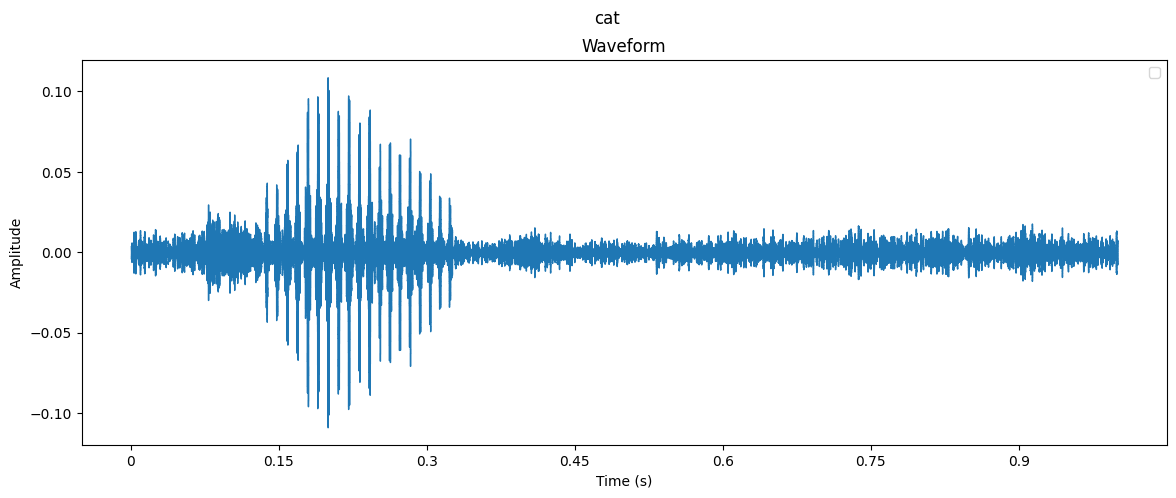

In [ ]:
plot_waveform(audio_data[40000],16000,labels[40000])
plt.legend()
plt.show()

MFCCs Mean: -14.715773
MFCCs shape: (20, 32)


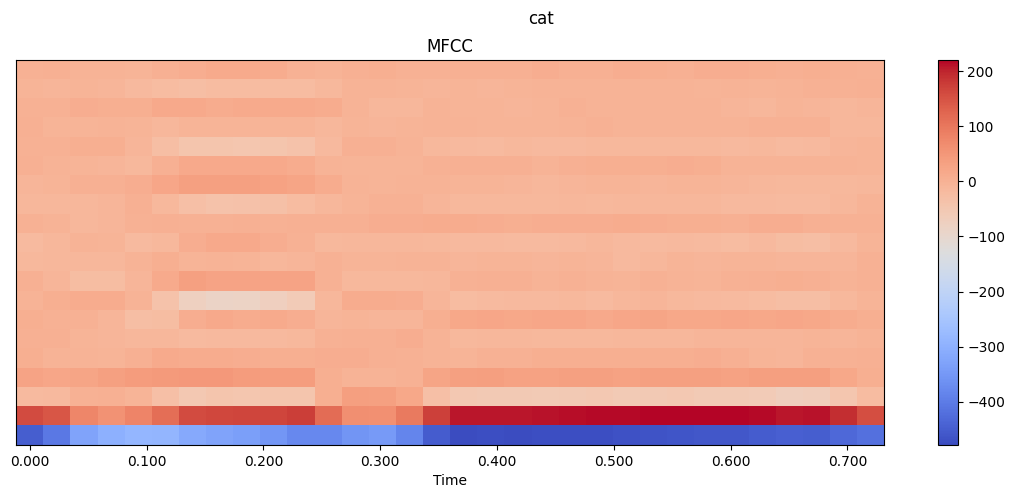

In [ ]:
mfccs_mean, mfccs = extract_mfcc(audio_data[40000], 16000)
print('MFCCs Mean:', mfccs_mean)
print('MFCCs shape:', mfccs.shape)
visualize_mfcc(mfccs,labels[40000])

Mel Mean: 0.022893468
Mel : (128, 32)


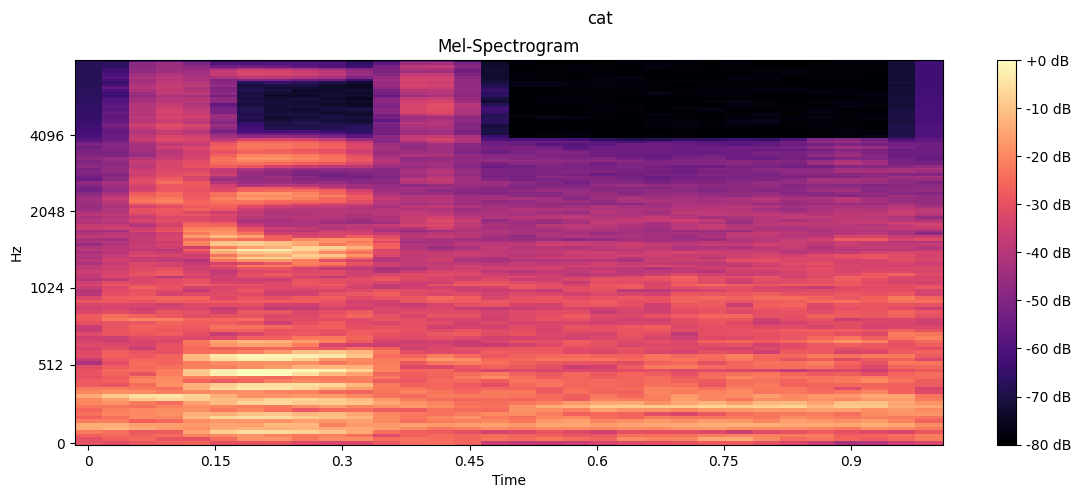

In [ ]:
mel_mean, mel = compute_mel_spectrogram(audio_data[40000],16000)
print('Mel Mean:',mel_mean)
print('Mel :',mel.shape)
visualize_mel_spectrogram(mel, labels[40000],16000)

In [ ]:
code = {label: idx for idx, label in enumerate(pd.unique(labels))}
pd.DataFrame(list(code.items()), columns=['Label', 'Value']).set_index('Label')

,Value
Label,
no,0
two,1
four,2
five,3
nine,4
right,5
off,6
yes,7
six,8


In [ ]:
for i in range(len(labels)):
    labels[i]=code[labels[i]]
pd.DataFrame(labels,columns=['Labels'])

,Labels
0,0
1,0
2,0
3,0
4,0
...,...
41844,29
41845,29
41846,29
41847,29


In [ ]:
data = np.array(audio_data).reshape(-1,16000,1)
label = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=18, shuffle =True)

In [ ]:
x_train.shape

(31386, 16000, 1)

In [ ]:
x_test.shape

(10463, 16000, 1)

In [ ]:
import tensorflow as tf
import keras
from keras import backend as K
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import BatchNormalization, Flatten
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import Sequential, Model

In [ ]:
num_class = 30
input_shape = (16000,1)

model = Sequential()

model.add(Conv1D(64, kernel_size=13, activation='relu',input_shape=input_shape))
model.add(MaxPooling1D(3))
model.add(Dropout(0.5))

model.add(Conv1D(64, kernel_size=13, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.5))

model.add(Conv1D(64, kernel_size=13, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 15988, 64)      │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 5329, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5329, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 5317, 64)       │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 1772, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1772, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 1760, 64)       │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 586, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 586, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 37504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,800,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,918,366 (18.76 MB)

 Trainable params: 4,918,366 (18.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 88s 80ms/step - accuracy: 0.1018 - loss: 3.1422 - val_accuracy: 0.3589 - val_loss: 2.1032
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 71ms/step - accuracy: 0.3002 - loss: 2.1877 - val_accuracy: 0.5378 - val_loss: 1.4143
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 71ms/step - accuracy: 0.4402 - loss: 1.6745 - val_accuracy: 0.6550 - val_loss: 1.0447
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 71ms/step - accuracy: 0.5137 - loss: 1.4249 - val_accuracy: 0.6940 - val_loss: 0.9614
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 71ms/step - accuracy: 0.5523 - loss: 1.2809 - val_accuracy: 0.7299 - val_loss: 0.8120
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 71ms/step - accuracy: 0.5760 - loss: 1.1956 - val_accuracy: 0.7560 - val_loss: 0.8030
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 71ms/step - accuracy: 0.5994 - loss: 1.1136 - val_accuracy: 0.7650 - val_loss: 0.7453
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 71ms/step - accuracy: 0.6117 - loss: 1.0674 - 

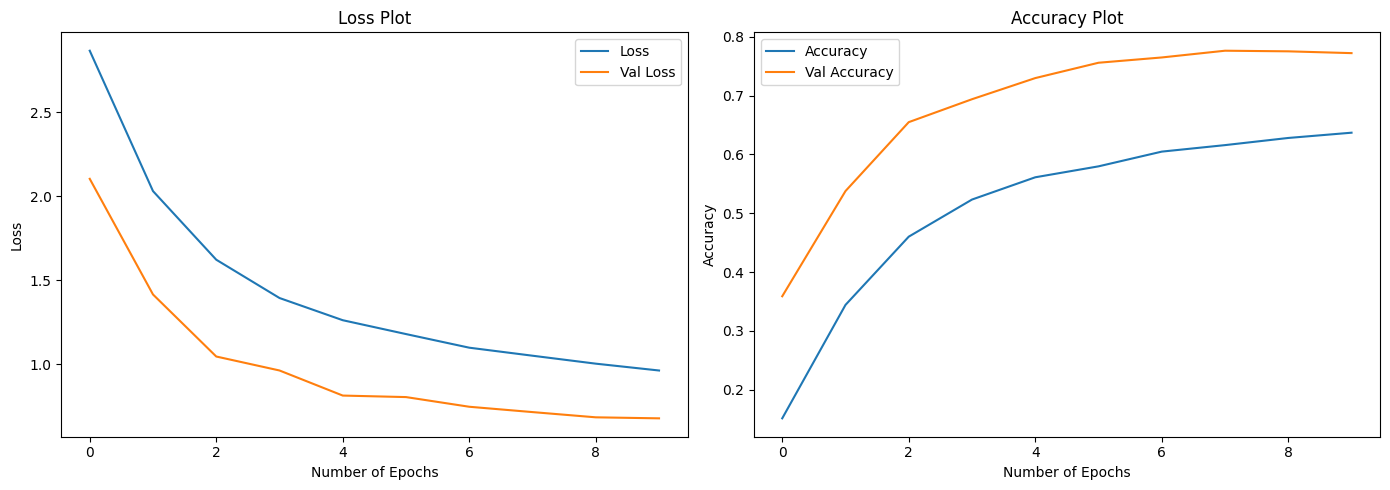

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(hist.history['loss'], label="Loss")
ax1.plot(hist.history["val_loss"], label="Val Loss")
ax1.set_xlabel("Number of Epochs")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.set_title("Loss Plot")

ax2.plot(hist.history['accuracy'], label="Accuracy")
ax2.plot(hist.history["val_accuracy"], label="Val Accuracy")
ax2.set_xlabel("Number of Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
ax2.set_title("Accuracy Plot")

plt.tight_layout()
plt.show()

In [ ]:
predict = model.predict(x_test)

327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
def get_Name(N):
    for x,y in code.items():
          if y==N:
                return x

In [ ]:
preN=[]
prename=[]
for row in predict:
    N=np.argmax(row)
    preN.append(N)
    prename.append(get_Name(N))
pd.DataFrame(prename,columns=['Predictions'])

,Predictions
0,seven
1,nine
2,left
3,right
4,four
...,...
10458,go
10459,on
10460,cat
10461,eight


In [ ]:
predict=[]
y_act=[]
for p in range(51):
    y_act.append(get_Name(y_test[p]))
    predict.append(prename[p])
pd_p=pd.DataFrame(y_act,columns=['y_act'])
pd_p['predict']=predict
pd_p

,y_act,predict
0,seven,seven
1,nine,nine
2,left,left
3,right,right
4,four,four
5,four,four
6,six,six
7,off,off
8,yes,yes
9,house,house


In [ ]:
num_class = 30
input_shape = (16000,1)

model = Sequential()

model.add(Conv1D(64, kernel_size=13, activation='relu',input_shape=input_shape))
model.add(MaxPooling1D(3))
model.add(Dropout(0.5))

model.add(Conv1D(64, kernel_size=13, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(64, kernel_size=13, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(64, kernel_size=13, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(64, kernel_size=13, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 15988, 64)      │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 5329, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 5329, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 5317, 64)       │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 1772, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 1772, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 1760, 64)       │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 586, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 586, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 574, 64)        │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 191, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 191, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 179, 64)        │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 59, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 59, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3776)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       483,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 707,806 (2.70 MB)

 Trainable params: 707,806 (2.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 101s 88ms/step - accuracy: 0.0816 - loss: 3.2264 - val_accuracy: 0.1936 - val_loss: 2.5591
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 71s 73ms/step - accuracy: 0.1997 - loss: 2.5583 - val_accuracy: 0.3790 - val_loss: 2.0030
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 72s 73ms/step - accuracy: 0.3497 - loss: 2.0112 - val_accuracy: 0.6450 - val_loss: 1.1205
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 72s 73ms/step - accuracy: 0.5104 - loss: 1.4964 - val_accuracy: 0.7203 - val_loss: 0.8357
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 72s 73ms/step - accuracy: 0.6151 - loss: 1.1676 - val_accuracy: 0.8060 - val_loss: 0.5680
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 72s 73ms/step - accuracy: 0.6753 - loss: 0.9875 - val_accuracy: 0.8476 - val_loss: 0.4684
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 72s 73ms/step - accuracy: 0.7123 - loss: 0.8880 - val_accuracy: 0.8825 - val_loss: 0.4164
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 72s 73ms/step - accuracy: 0.7435 - loss: 0.7809 -

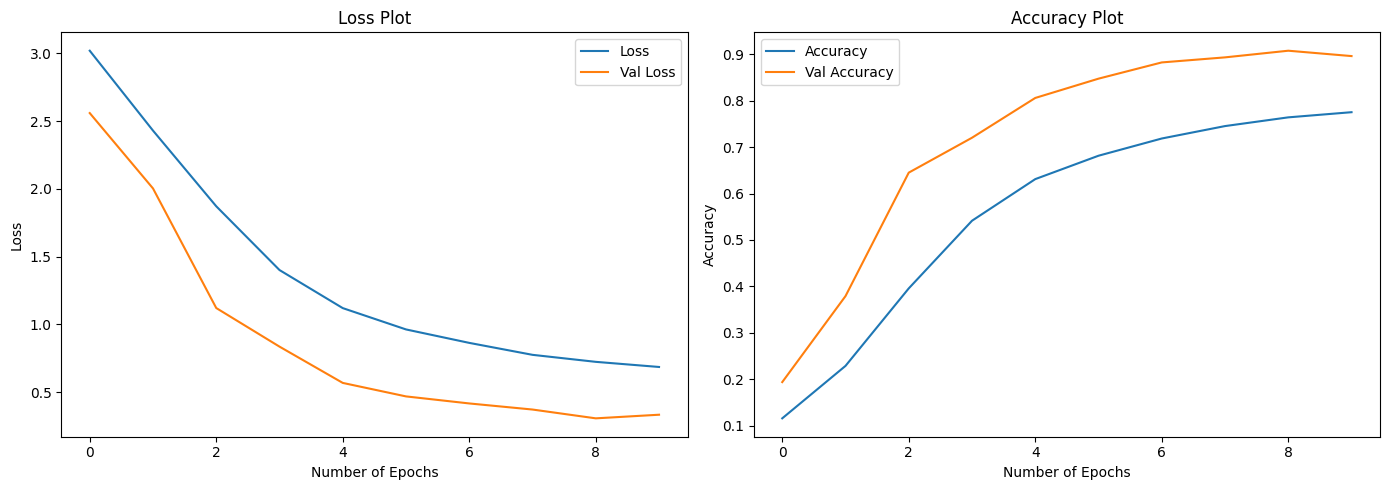

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(hist.history['loss'], label="Loss")
ax1.plot(hist.history["val_loss"], label="Val Loss")
ax1.set_xlabel("Number of Epochs")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.set_title("Loss Plot")

ax2.plot(hist.history['accuracy'], label="Accuracy")
ax2.plot(hist.history["val_accuracy"], label="Val Accuracy")
ax2.set_xlabel("Number of Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
ax2.set_title("Accuracy Plot")

plt.tight_layout()
plt.show()

In [ ]:
predict = model.predict(x_test)

327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [ ]:
preN=[]
prename=[]
for row in predict:
    N=np.argmax(row)
    preN.append(N)
    prename.append(get_Name(N))
pd.DataFrame(prename,columns=['Predictions'])

,Predictions
0,seven
1,nine
2,left
3,right
4,four
...,...
10458,no
10459,on
10460,cat
10461,eight


In [ ]:
predict=[]
y_act=[]
for p in range(51):
    y_act.append(get_Name(y_test[p]))
    predict.append(prename[p])
pd_p=pd.DataFrame(y_act,columns=['y_act'])
pd_p['predict']=predict
pd_p

,y_act,predict
0,seven,seven
1,nine,nine
2,left,left
3,right,right
4,four,four
5,four,four
6,six,six
7,off,up
8,yes,yes
9,house,house


In [ ]:
num_class = 30
input_shape = (16000,1)

model = Sequential()

model.add(Conv1D(64, kernel_size=13, activation='relu',input_shape=input_shape))
model.add(MaxPooling1D(3))
model.add(Dropout(0.5))

model.add(Conv1D(64, kernel_size=13, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(64, kernel_size=13, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(64, kernel_size=13, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(64, kernel_size=13, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(64, kernel_size=13, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(64, kernel_size=13, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 15988, 64)      │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 5329, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 5329, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 5317, 64)       │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 1772, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 1772, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 1760, 64)       │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 586, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 586, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 574, 64)        │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 191, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 191, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 179, 64)        │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 59, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 59, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 47, 64)         │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 3, 64)          │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,25

 Total params: 339,294 (1.29 MB)

 Trainable params: 339,294 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 107s 91ms/step - accuracy: 0.0550 - loss: 3.3810 - val_accuracy: 0.0576 - val_loss: 3.3645
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 71s 73ms/step - accuracy: 0.0540 - loss: 3.3693 - val_accuracy: 0.0576 - val_loss: 3.3648
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 71s 73ms/step - accuracy: 0.0573 - loss: 3.3671 - val_accuracy: 0.0558 - val_loss: 3.3652
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 71s 73ms/step - accuracy: 0.0549 - loss: 3.3678 - val_accuracy: 0.0558 - val_loss: 3.3637
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 71s 73ms/step - accuracy: 0.0586 - loss: 3.3638 - val_accuracy: 0.0576 - val_loss: 3.3637
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 71s 73ms/step - accuracy: 0.0571 - loss: 3.3664 - val_accuracy: 0.0558 - val_loss: 3.3639
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 72s 73ms/step - accuracy: 0.0580 - loss: 3.3660 - val_accuracy: 0.0558 - val_loss: 3.3639
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 72s 73ms/step - accuracy: 0.0580 - loss: 3.3686 -

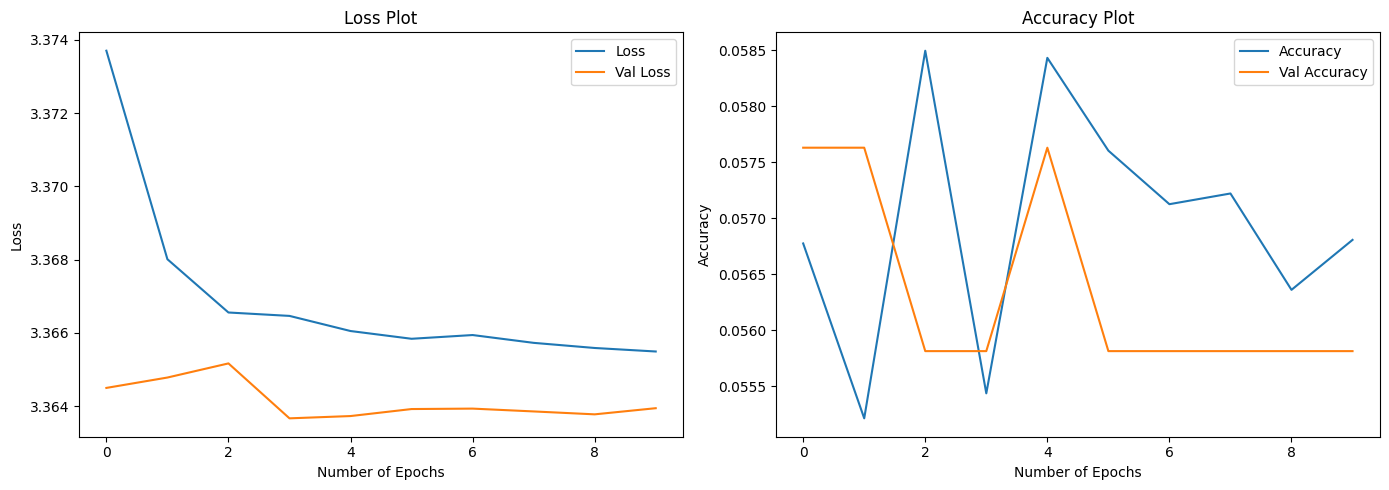

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(hist.history['loss'], label="Loss")
ax1.plot(hist.history["val_loss"], label="Val Loss")
ax1.set_xlabel("Number of Epochs")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.set_title("Loss Plot")

ax2.plot(hist.history['accuracy'], label="Accuracy")
ax2.plot(hist.history["val_accuracy"], label="Val Accuracy")
ax2.set_xlabel("Number of Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
ax2.set_title("Accuracy Plot")

plt.tight_layout()
plt.show()

In [ ]:
predict = model.predict(x_test)

327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
preN=[]
prename=[]
for row in predict:
    N=np.argmax(row)
    preN.append(N)
    prename.append(get_Name(N))
pd.DataFrame(prename,columns=['Predictions'])

,Predictions
0,four
1,four
2,four
3,four
4,four
...,...
10458,four
10459,four
10460,four
10461,four


In [ ]:
predict=[]
y_act=[]
for p in range(51):
    y_act.append(get_Name(y_test[p]))
    predict.append(prename[p])
pd_p=pd.DataFrame(y_act,columns=['y_act'])
pd_p['predict']=predict
pd_p

,y_act,predict
0,seven,four
1,nine,four
2,left,four
3,right,four
4,four,four
5,four,four
6,six,four
7,off,four
8,yes,four
9,house,four
